# A. Implement Reinforcement Learning using an example of a maze environment that the agent needs to explore.

In [1]:
import numpy as np
import matplotlib.pyplot as plt



# Define the Maze and Start Position

In [2]:
# Define the maze (0: free cell, 1: obstacle, 2: goal)
maze = np.array([
    [0, 0, 1, 0, 0],
    [1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 2]
])

# Define start position
start_position = (0, 0)


# Set Up Q-learning Parameters and Initialize Q-table

In [3]:
# Q-learning parameters
alpha = 0.8       # Learning rate
gamma = 0.95      # Discount factor
epsilon = 0.1     # Exploration rate

# Initialize Q-table with zeros (size: maze cells x 4 actions)
q_table = np.zeros((maze.size, 4))


# Define Actions and Helper Functions

In [4]:
# Define actions (0: up, 1: down, 2: left, 3: right)
actions = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

# Convert position to a state for Q-table indexing
def pos_to_state(pos):
    return pos[0] * maze.shape[1] + pos[1]

# Check if position is valid within maze bounds and not an obstacle
def is_valid_position(pos):
    return (0 <= pos[0] < maze.shape[0] and 
            0 <= pos[1] < maze.shape[1] and 
            maze[pos] != 1)


# Implement Q-learning Algorithm

In [7]:
# Number of episodes to train the agent
import random
episodes = 1000

for episode in range(episodes):
    position = start_position  # Start position at each episode
    
    while True:
        state = pos_to_state(position)
        
        # Choose action with epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = random.choice(list(actions.keys()))
        else:
            action = np.argmax(q_table[state])

        # Calculate new position based on chosen action
        new_position = (position[0] + actions[action][0], position[1] + actions[action][1])

        # Check if the new position is within bounds and not an obstacle
        if not is_valid_position(new_position):
            reward = -1  # Penalize hitting an obstacle
            q_table[state, action] += alpha * (reward - q_table[state, action])
            continue
        
        # Check if goal is reached
        if maze[new_position] == 2:
            reward = 10  # Reward for reaching the goal
            q_table[state, action] += alpha * (reward + gamma * 0 - q_table[state, action])
            break

        # Reward for a regular move
        new_state = pos_to_state(new_position)
        reward = -0.04  # Small penalty for each move

        # Update Q-table
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state, action])

        # Move to the new position
        position = new_position


# Visualize the Path Taken by the Agent

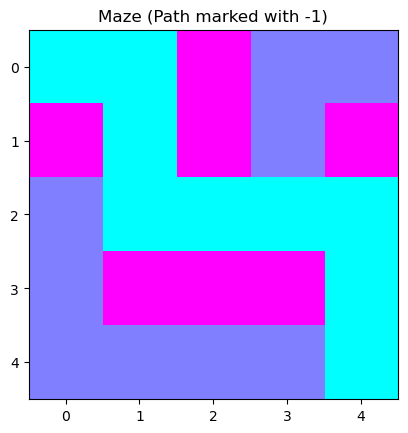

In [8]:
# Helper function to visualize the maze with the agent's path
def plot_maze(path=None):
    maze_copy = maze.copy()
    if path:
        for pos in path:
            maze_copy[pos] = -1  # Mark path with -1

    plt.imshow(maze_copy, cmap='cool')
    plt.title("Maze (Path marked with -1)")
    plt.show()

# Generate the path the agent will take using the Q-table
def find_path():
    position = start_position
    path = [position]
    
    while True:
        state = pos_to_state(position)
        action = np.argmax(q_table[state])
        new_position = (position[0] + actions[action][0], position[1] + actions[action][1])

        if maze[new_position] == 2:  # Goal reached
            path.append(new_position)
            break
        elif is_valid_position(new_position):
            position = new_position
            path.append(position)
        else:
            break  # If stuck

    return path

# Plot the maze with the path found by the agent
path = find_path()
plot_maze(path)
